In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.layers import Input
from keras.optimizers import Adam

# 1. 데이터 가져오기 및 분포 확인

In [4]:
# 배추 데이터 가져오기
raw_cabbage = pd.read_csv('C:/sa/cabbage.csv')

# object 타입 쉼표 제거
columns_to_convert = ['exchangeRate', 'retailPrice', 'wholesalePrice', 'exportVolume', 'exportValue', 'importVolume', 'importValue']
for col in columns_to_convert:
    raw_cabbage[col] = raw_cabbage[col].str.replace(',', '')

# 숫자형으로 변환, 변환할 수 없는 값은 NaN으로 설정
raw_cabbage[columns_to_convert] = raw_cabbage[columns_to_convert].apply(pd.to_numeric, errors='coerce')

raw_cabbage.head()

,month,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
0,14-Jan,1065.0,0.7,3.5,4.9,13.0,943,407.0,239150,268976921850,44000,23372490,211567000.0
1,14-Feb,1071.0,1.9,6.6,1.8,16.2,892,357.0,354935,210467565,0,0,211567000.0
2,14-Mar,1071.0,7.9,13.1,3.5,7.2,786,310.0,968363,497062881,0,0,211567000.0
3,14-Apr,1045.0,14.0,19.6,9.4,31.0,796,307.0,1525647,870870605,24000,12497155,211567000.0
4,14-May,1025.0,18.9,25.3,13.8,63.0,736,283.0,3135569,1669132550,0,0,211567000.0


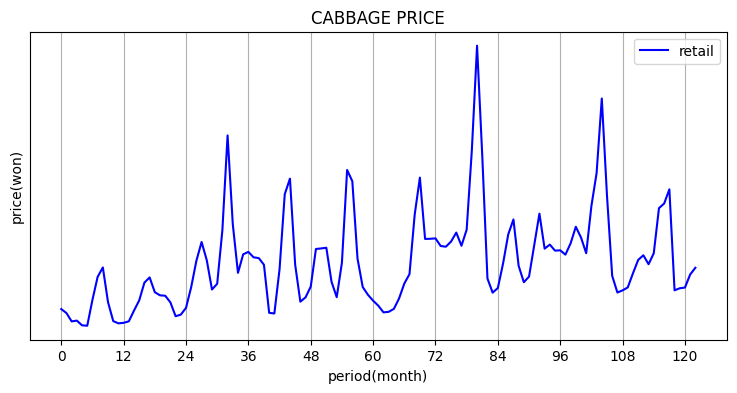

In [5]:
# 배추 분포 확인하기
plt.figure(figsize = (9, 4))
plt.title('CABBAGE PRICE')
plt.ylabel('price(won)')
plt.xlabel('period(month)')
plt.grid()
# x축을 12씩 표시, y축을 500단위로 표시
plt.xticks(range(0, 121, 12))
plt.yticks(range(0, 000, 500))

# 이제 데이터 추가
plt.plot(raw_cabbage['retailPrice'], label='retail', color='b')
plt.legend(loc = 'best')
# 출력
plt.show()

In [6]:
# 양파 데이터 가져오기
raw_onion = pd.read_csv('C:/sa/onion.csv')

# object 타입 쉼표 제거
columns_to_convert = ['exchangeRate', 'retailPrice', 'wholesalePrice', 'exportVolume', 'exportValue', 'importVolume', 'importValue']
for col in columns_to_convert:
    raw_onion[col] = raw_onion[col].str.replace(',', '')

# 숫자형으로 변환, 변환할 수 없는 값은 NaN으로 설정
raw_onion[columns_to_convert] = raw_onion[columns_to_convert].apply(pd.to_numeric, errors='coerce')

raw_onion.head()

,month,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
0,14-Jan,1065.0,0.7,3.5,4.9,13.0,1804,755.0,0,0,663800,392668695,132496416.7
1,14-Feb,1071.0,1.9,6.6,1.8,16.2,1842,723.0,0,0,352190,216031410,132496416.7
2,14-Mar,1071.0,7.9,13.1,3.5,7.2,1668,633.0,0,0,419100,246537774,132496416.7
3,14-Apr,1045.0,14.0,19.6,9.4,31.0,1534,584.0,0,0,548520,312361995,132496416.7
4,14-May,1025.0,18.9,25.3,13.8,63.0,1544,567.0,50,61500,438500,254319925,132496416.7


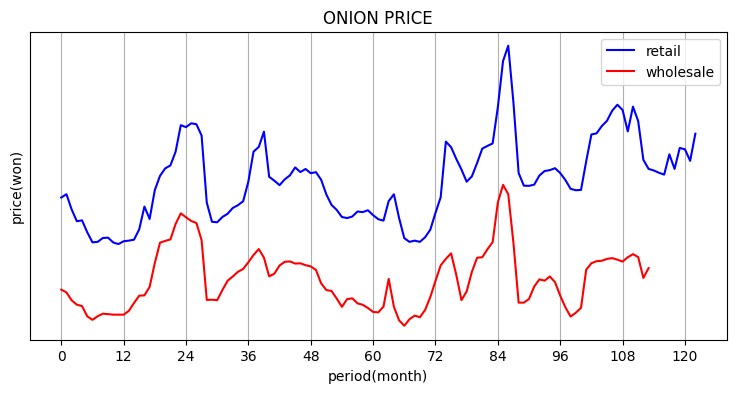

In [7]:
# 양파 분포 확인하기
plt.figure(figsize = (9, 4))
plt.title('ONION PRICE')
plt.ylabel('price(won)')
plt.xlabel('period(month)')
plt.grid()
# x축을 12씩 표시, y축을 500단위로 표시
plt.xticks(range(0, 121, 12))
plt.yticks(range(0, 000, 500))

# 이제 데이터 추가
plt.plot(raw_onion['retailPrice'], label='retail', color='b')
plt.plot(raw_onion['wholesalePrice'], label='wholesale', color='r')
plt.legend(loc = 'best')
# 출력
plt.show()

In [8]:
# 마늘 데이터 가져오기
raw_garlic = pd.read_csv('C:/sa/garlic.csv')

# object 타입 쉼표 제거
columns_to_convert = ['exchangeRate', 'retailPrice', 'wholesalePrice', 'exportVolume', 'exportValue', 'importVolume', 'importValue']
for col in columns_to_convert:
    raw_garlic[col] = raw_garlic[col].str.replace(',', '')

# 숫자형으로 변환, 변환할 수 없는 값은 NaN으로 설정
raw_garlic[columns_to_convert] = raw_garlic[columns_to_convert].apply(pd.to_numeric, errors='coerce')

raw_garlic.head()

,month,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
0,14-Jan,1065.0,0.7,3.5,4.9,13.0,6495,3540.0,0,0,2379700,1692118860,29480083.33
1,14-Feb,1071.0,1.9,6.6,1.8,16.2,6428,3436.0,0,0,2554740,1815962967,29480083.33
2,14-Mar,1071.0,7.9,13.1,3.5,7.2,6352,3279.0,0,0,4657565,3282345108,29480083.33
3,14-Apr,1045.0,14.0,19.6,9.4,31.0,6216,3398.0,500,3965775,2701740,1791522920,29480083.33
4,14-May,1025.0,18.9,25.3,13.8,63.0,6344,3497.0,13649,60124450,2248896,1580966150,29480083.33


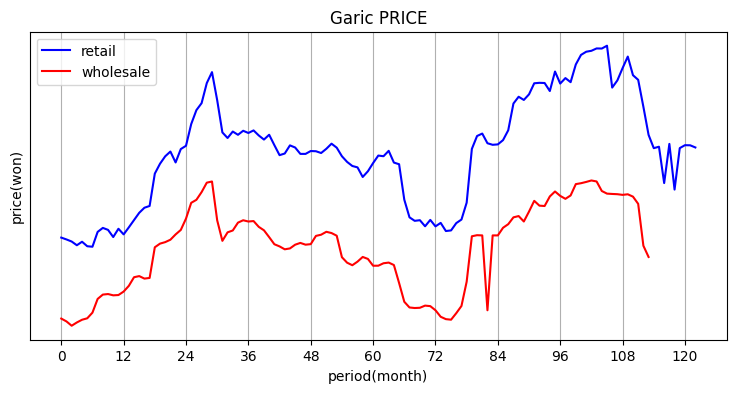

In [9]:
# 마늘 분포 확인하기
plt.figure(figsize = (9, 4))
plt.title('Garic PRICE')
plt.ylabel('price(won)')
plt.xlabel('period(month)')
plt.grid()
# x축을 12씩 표시, y축을 500단위로 표시
plt.xticks(range(0, 121, 12))
plt.yticks(range(0, 000, 500))

# 이제 데이터 추가
plt.plot(raw_garlic['retailPrice'], label='retail', color='b')
plt.plot(raw_garlic['wholesalePrice'], label='wholesale', color='r')
plt.legend(loc = 'best')
# 출력
plt.show()

In [10]:
# 무데이터 가져오기
raw_radish = pd.read_csv('C:/sa/radish.csv')

# object 타입 쉼표 제거
columns_to_convert = ['exchangeRate', 'retailPrice', 'wholesalePrice', 'exportVolume', 'exportValue', 'importVolume', 'importValue']
for col in columns_to_convert:
    raw_radish[col] = raw_radish[col].str.replace(',', '')

# 숫자형으로 변환, 변환할 수 없는 값은 NaN으로 설정
raw_radish[columns_to_convert] = raw_radish[columns_to_convert].apply(pd.to_numeric, errors='coerce')

raw_radish.head()

,month,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
0,14-Jan,1065.0,0.7,3.5,4.9,13.0,1061,383.0,461700,230555460,1920952,503412720,108080833.3
1,14-Feb,1071.0,1.9,6.6,1.8,16.2,1031,359.0,387655,195740244,677140,207878958,108080833.3
2,14-Mar,1071.0,7.9,13.1,3.5,7.2,1011,378.0,203055,90040041,807390,245453922,108080833.3
3,14-Apr,1045.0,14.0,19.6,9.4,31.0,1097,415.0,19611,18762975,505040,156387385,108080833.3
4,14-May,1025.0,18.9,25.3,13.8,63.0,1267,434.0,29988,17664850,550800,160330500,108080833.3


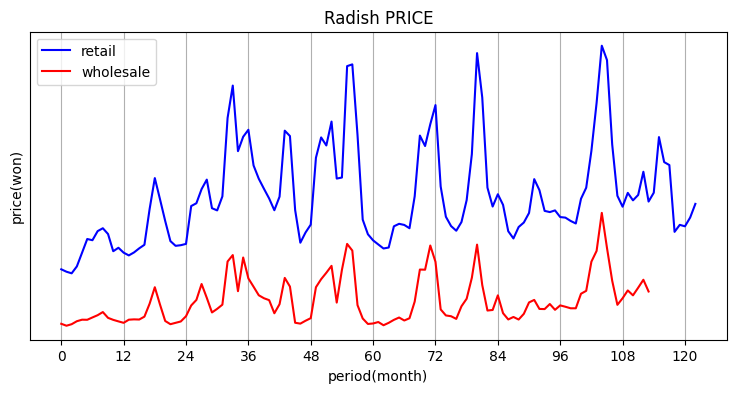

In [11]:
# 무 분포 확인하기
plt.figure(figsize = (9, 4))
plt.title('Radish PRICE')
plt.ylabel('price(won)')
plt.xlabel('period(month)')
plt.grid()
# x축을 12씩 표시, y축을 500단위로 표시
plt.xticks(range(0, 121, 12))
plt.yticks(range(0, 000, 500))

# 이제 데이터 추가
plt.plot(raw_radish['retailPrice'], label='retail', color='b')
plt.plot(raw_radish['wholesalePrice'], label='wholesale', color='r')
plt.legend(loc = 'best')
# 출력
plt.show()

In [12]:
# 고추 데이터 가져오기
raw_pepper = pd.read_csv('C:/sa/pepper.csv')

# object 타입 쉼표 제거
columns_to_convert = ['exchangeRate', 'retailPrice', 'wholesalePrice', 'exportVolume', 'exportValue', 'importVolume', 'importValue']
for col in columns_to_convert:
    raw_pepper[col] = raw_pepper[col].str.replace(',', '')

# 숫자형으로 변환, 변환할 수 없는 값은 NaN으로 설정
raw_pepper[columns_to_convert] = raw_pepper[columns_to_convert].apply(pd.to_numeric, errors='coerce')

raw_pepper.head()

,month,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
0,14-Jan,1065.0,0.7,3.5,4.9,13.0,8540,4370.0,36183,267204240,0,0.0,22581916.67
1,14-Feb,1071.0,1.9,6.6,1.8,16.2,10310,4817.0,30152,232354521,0,0.0,22581916.67
2,14-Mar,1071.0,7.9,13.1,3.5,7.2,11970,5785.0,33551,246039759,0,0.0,22581916.67
3,14-Apr,1045.0,14.0,19.6,9.4,31.0,9600,3905.0,36325,274354300,0,0.0,22581916.67
4,14-May,1025.0,18.9,25.3,13.8,63.0,8210,3368.0,50730,264596575,0,0.0,22581916.67


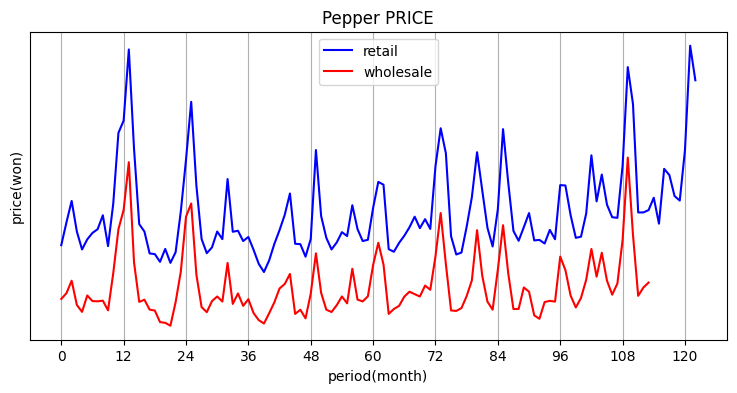

In [13]:
# 고추 데이터 분포 확인하기
plt.figure(figsize = (9, 4))
plt.title('Pepper PRICE')
plt.ylabel('price(won)')
plt.xlabel('period(month)')
plt.grid()
# x축을 12씩 표시, y축을 500단위로 표시
plt.xticks(range(0, 121, 12))
plt.yticks(range(0, 000, 500))

# 이제 데이터 추가
plt.plot(raw_pepper['retailPrice'], label='retail', color='b')
plt.plot(raw_pepper['wholesalePrice'], label='wholesale', color='r')
plt.legend(loc = 'best')
# 출력
plt.show()

# 2. 데이터 전처리

### (1). 결측치 제거

In [14]:
raw_cabbage.describe()

,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,114.000000,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02
mean,1170.203333,13.648780,18.043902,11.230081,100.296748,1553.642276,818.508772,1.692027e+06,3.451747e+09,3.749009e+04,2.288801e+07,1.692369e+08
std,86.136947,9.406515,10.019965,7.782799,119.878119,612.013890,445.759573,1.410411e+06,2.415877e+10,1.293400e+05,9.585551e+07,4.001445e+07
min,1019.000000,0.200000,0.100000,0.200000,0.000000,731.000000,283.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1115.000000,3.900000,8.050000,4.150000,22.650000,1121.500000,535.750000,5.805860e+05,4.402427e+08,0.000000e+00,0.000000e+00,1.549754e+08
50%,1148.000000,14.100000,19.600000,9.400000,62.400000,1473.000000,753.000000,1.407770e+06,1.078436e+09,0.000000e+00,0.000000e+00,1.779147e+08
75%,1205.500000,22.700000,27.600000,18.850000,130.650000,1788.500000,967.500000,2.375417e+06,1.891359e+09,1.663700e+04,1.262277e+07,1.993288e+08
max,1427.000000,28.800000,33.300000,25.200000,675.700000,4296.000000,3075.000000,6.474715e+06,2.689769e+11,1.081765e+06,8.732517e+08,2.115670e+08


In [15]:
# 최솟값이 0인 열이 있는지 확인
for col in raw_cabbage.columns:

    if raw_cabbage[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

rainfall <class 'str'>
exportVolume <class 'str'>
exportValue <class 'str'>
importVolume <class 'str'>
importValue <class 'str'>
production <class 'str'>


In [16]:
# 각 column에 0 몇개인지 확인
for col in raw_cabbage.columns:

    missing_rows = raw_cabbage.loc[raw_cabbage[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 2
retailPrice: 0
wholesalePrice: 0
exportVolume: 1
exportValue: 1
importVolume: 68
importValue: 68
production: 3


In [17]:
# 최솟값이 0인 열의 행 출력
raw_cabbage.loc[(raw_cabbage['rainfall'] == 0) | 
                (raw_cabbage['wholesalePrice'] == 0) |
                (raw_cabbage['exportVolume'] == 0) | 
                (raw_cabbage['exportValue'] == 0) | 
                (raw_cabbage['importVolume'] == 0) | 
                (raw_cabbage['importValue'] == 0) | 
                (raw_cabbage['production'] == 0)]

,month,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
1,14-Feb,1071.00,1.9,6.6,1.8,16.2,892,357.0,354935,210467565,0,0,211567000.0
2,14-Mar,1071.00,7.9,13.1,3.5,7.2,786,310.0,968363,497062881,0,0,211567000.0
4,14-May,1025.00,18.9,25.3,13.8,63.0,736,283.0,3135569,1669132550,0,0,211567000.0
6,14-Jul,1020.00,26.1,30.6,22.9,207.9,1060,639.0,576890,483739080,0,0,211567000.0
7,14-Aug,1025.00,25.2,29.0,22.1,172.8,1353,665.0,1144727,856513575,0,0,211567000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,23-Nov,1310.00,6.8,11.5,2.9,81.9,1182,NaN,3566024,3103256380,0,0,103534000.0
119,23-Dec,1304.00,1.1,5.2,2.5,85.9,1208,NaN,1394899,1172582880,0,0,103534000.0
120,24-Jan,1323.57,0.5,3.6,3.9,18.9,1217,NaN,1534527,1295502375,0,0,0.0
121,24-Feb,1331.74,3.8,8.2,0.2,74.7,1383,NaN,584282,548206776,0,0,0.0


In [18]:
# 결측치 처리위해 0을 모두 NaN으로 대체
raw_cabbage['rainfall'] = raw_cabbage['rainfall'].replace(0, np.nan)
raw_cabbage['wholesalePrice'] = raw_cabbage['wholesalePrice'].replace(0, np.nan)
raw_cabbage['exportVolume'] = raw_cabbage['exportVolume'].replace(0, np.nan)
raw_cabbage['exportValue'] = raw_cabbage['exportValue'].replace(0, np.nan)
raw_cabbage['importVolume'] = raw_cabbage['importVolume'].replace(0, np.nan)
raw_cabbage['importValue'] = raw_cabbage['importValue'].replace(0, np.nan)
raw_cabbage['production'] = raw_cabbage['production'].replace(0, np.nan)

# NaN으로 잘 바뀌었나 확인
for col in raw_cabbage.columns:
    missing_rows = raw_cabbage.loc[raw_cabbage[col]==0].shape[0]    # 0의 수 계산
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 0
retailPrice: 0
wholesalePrice: 0
exportVolume: 0
exportValue: 0
importVolume: 0
importValue: 0
production: 0


In [19]:
# 결측치의 개수가 적은 열은 평균값으로 대체
raw_cabbage.loc[np.isnan(raw_cabbage.rainfall)==True, 'rainfall'] = raw_cabbage.rainfall.mean()
raw_cabbage.loc[np.isnan(raw_cabbage.wholesalePrice)==True, 'wholesalePrice'] = raw_cabbage.wholesalePrice.mean()
raw_cabbage.loc[np.isnan(raw_cabbage.exportVolume)==True, 'exportVolume'] = raw_cabbage.exportVolume.mean()
raw_cabbage.loc[np.isnan(raw_cabbage.exportValue)==True, 'exportValue'] = raw_cabbage.exportValue.mean()
raw_cabbage.loc[np.isnan(raw_cabbage.production)==True, 'production'] = raw_cabbage.production.mean()

# 결측치의 개수가 많은 열은 삭제
raw_cabbage.drop(columns=['importVolume'], inplace=True)
raw_cabbage.drop(columns=['importValue'], inplace=True)

# 결측치 제거가 잘 되었나 확인
for col in raw_cabbage.columns:
    missing_rows = raw_cabbage[col].isna().sum()     # NaN 값 개수 계산
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 0
retailPrice: 0
wholesalePrice: 0
exportVolume: 0
exportValue: 0
production: 0


In [20]:
raw_onion.describe()

,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,114.000000,123.000000,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02
mean,1170.203333,13.648780,18.043902,11.230081,100.296748,2000.569106,876.464912,499.967480,5.572971e+05,9.150935e+05,6.143862e+08,1.085849e+08
std,86.136947,9.406515,10.019965,7.782799,119.878119,467.939100,339.739389,3055.142526,2.181011e+06,6.532956e+05,3.209397e+08,2.380603e+07
min,1019.000000,0.200000,0.100000,0.200000,0.000000,1274.000000,344.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1115.000000,3.900000,8.050000,4.150000,22.650000,1624.000000,600.000000,0.000000,0.000000e+00,6.618480e+05,4.018347e+08,9.735225e+07
50%,1148.000000,14.100000,19.600000,9.400000,62.400000,2007.000000,856.500000,0.000000,0.000000e+00,8.550400e+05,5.154424e+08,9.963025e+07
75%,1205.500000,22.700000,27.600000,18.850000,130.650000,2311.000000,1082.750000,0.000000,0.000000e+00,1.091110e+06,8.249089e+08,1.313960e+08
max,1427.000000,28.800000,33.300000,25.200000,675.700000,3533.000000,1948.000000,24000.000000,1.914141e+07,7.214420e+06,1.723916e+09,1.328708e+08


In [21]:
# 최솟값이 0인 열이 있는지 확인
for col in raw_onion.columns:

    if raw_onion[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

rainfall <class 'str'>
exportVolume <class 'str'>
exportValue <class 'str'>
importVolume <class 'str'>
importValue <class 'str'>
production <class 'str'>


In [22]:
# 각 column에 0 몇개인지 확인
for col in raw_onion.columns:

    missing_rows = raw_onion.loc[raw_onion[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 2
retailPrice: 0
wholesalePrice: 0
exportVolume: 96
exportValue: 96
importVolume: 1
importValue: 1
production: 3


In [23]:
# 최솟값이 0인 열의 행 출력
raw_onion.loc[(raw_onion['rainfall'] == 0) |
                (raw_onion['wholesalePrice'] == 0) | 
                (raw_onion['exportVolume'] == 0) | 
                (raw_onion['exportValue'] == 0) | 
                (raw_onion['importVolume'] == 0) | 
                (raw_onion['importValue'] == 0) | 
                (raw_onion['production'] == 0)]

,month,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
0,14-Jan,1065.00,0.7,3.5,4.9,13.0,1804,755.0,0,0,663800,392668695,132496416.7
1,14-Feb,1071.00,1.9,6.6,1.8,16.2,1842,723.0,0,0,352190,216031410,132496416.7
2,14-Mar,1071.00,7.9,13.1,3.5,7.2,1668,633.0,0,0,419100,246537774,132496416.7
3,14-Apr,1045.00,14.0,19.6,9.4,31.0,1534,584.0,0,0,548520,312361995,132496416.7
5,14-Jun,1019.00,23.1,27.8,19.7,98.1,1408,451.0,0,0,500730,277344287,132496416.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,22-Aug,1318.00,25.7,28.9,23.1,564.8,2535,1079.0,0,0,1752990,1723916322,99630250.0
104,22-Sep,1392.00,22.4,27.2,18.2,201.5,2618,1084.0,0,0,1389872,1450745184,99630250.0
120,24-Jan,1323.57,0.5,3.6,3.9,18.9,2353,NaN,525,2015797,1334042,1152657406,0.0
121,24-Feb,1331.74,3.8,8.2,0.2,74.7,2222,NaN,450,1447601,896253,788772289,0.0


In [24]:
# 결측치 처리위해 0을 모두 NaN으로 대체
raw_onion['rainfall'] = raw_onion['rainfall'].replace(0, np.nan)
raw_onion['wholesalePrice'] = raw_onion['wholesalePrice'].replace(0, np.nan)
raw_onion['exportVolume'] = raw_onion['exportVolume'].replace(0, np.nan)
raw_onion['exportValue'] = raw_onion['exportValue'].replace(0, np.nan)
raw_onion['importVolume'] = raw_onion['importVolume'].replace(0, np.nan)
raw_onion['importValue'] = raw_onion['importValue'].replace(0, np.nan)
raw_onion['production'] = raw_onion['production'].replace(0, np.nan)

# NaN으로 잘 바뀌었나 확인
for col in raw_onion.columns:
    missing_rows = raw_onion.loc[raw_onion[col]==0].shape[0]    # 0의 수 계산
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 0
retailPrice: 0
wholesalePrice: 0
exportVolume: 0
exportValue: 0
importVolume: 0
importValue: 0
production: 0


In [25]:
# 결측치의 개수가 적은 열은 평균값으로 대체
raw_onion.loc[np.isnan(raw_onion.rainfall)==True, 'rainfall'] = raw_onion.rainfall.mean()
raw_onion.loc[np.isnan(raw_onion.wholesalePrice)==True, 'wholesalePrice'] = raw_onion.wholesalePrice.mean()
raw_onion.loc[np.isnan(raw_onion.importVolume)==True, 'importVolume'] = raw_onion.importVolume.mean()
raw_onion.loc[np.isnan(raw_onion.importValue)==True, 'importValue'] = raw_onion.importValue.mean()
raw_onion.loc[np.isnan(raw_onion.production)==True, 'production'] = raw_onion.production.mean()

# 결측치의 개수가 많은 열은 삭제
raw_onion.drop(columns=['exportVolume'], inplace=True)
raw_onion.drop(columns=['exportValue'], inplace=True)

# 결측치 제거가 잘 되었나 확인
for col in raw_onion.columns:
    missing_rows = raw_onion[col].isna().sum()     # NaN 값 개수 계산
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 0
retailPrice: 0
wholesalePrice: 0
importVolume: 0
importValue: 0
production: 0


In [26]:
raw_garlic.describe()

,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,114.000000,123.000000,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02
mean,1170.203333,13.648780,18.043902,11.230081,100.296748,9652.642276,6137.587719,2242.317073,1.301045e+07,2.869388e+06,3.430776e+09,2.586598e+07
std,86.136947,9.406515,10.019965,7.782799,119.878119,1998.331870,1545.899943,5033.355225,2.753583e+07,1.316526e+06,1.694655e+09,5.220268e+06
min,1019.000000,0.200000,0.100000,0.200000,0.000000,6162.000000,3279.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1115.000000,3.900000,8.050000,4.150000,22.650000,8063.500000,4913.500000,100.000000,4.322525e+05,1.949042e+06,2.176936e+09,2.296242e+07
50%,1148.000000,14.100000,19.600000,9.400000,62.400000,9761.000000,6353.500000,500.000000,4.901352e+06,2.572450e+06,2.982466e+09,2.571100e+07
75%,1205.500000,22.700000,27.600000,18.850000,130.650000,10892.000000,7222.750000,1046.000000,1.072101e+07,3.505165e+06,4.363078e+09,2.948008e+07
max,1427.000000,28.800000,33.300000,25.200000,675.700000,13498.000000,8580.000000,28068.000000,2.007812e+08,9.931537e+06,9.584891e+09,3.230592e+07


In [27]:
# 최솟값이 0인 열이 있는지 확인
for col in raw_garlic.columns:

    if raw_garlic[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

rainfall <class 'str'>
exportVolume <class 'str'>
exportValue <class 'str'>
importVolume <class 'str'>
importValue <class 'str'>
production <class 'str'>


In [28]:
# 각 column에 0 몇개인지 확인
for col in raw_garlic.columns:

    missing_rows = raw_garlic.loc[raw_garlic[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 2
retailPrice: 0
wholesalePrice: 0
exportVolume: 21
exportValue: 21
importVolume: 1
importValue: 1
production: 3


In [29]:
# 최솟값이 0인 열의 행 출력
raw_garlic.loc[(raw_garlic['rainfall'] == 0) |
                (raw_garlic['wholesalePrice'] == 0) |
                (raw_garlic['exportVolume'] == 0) | 
                (raw_garlic['exportValue'] == 0) | 
                (raw_garlic['importVolume'] == 0) | 
                (raw_garlic['importValue'] == 0) | 
                (raw_garlic['production'] == 0)]

,month,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
0,14-Jan,1065.00,0.7,3.5,4.9,13.0,6495,3540.0,0,0,2379700,1692118860,29480083.33
1,14-Feb,1071.00,1.9,6.6,1.8,16.2,6428,3436.0,0,0,2554740,1815962967,29480083.33
2,14-Mar,1071.00,7.9,13.1,3.5,7.2,6352,3279.0,0,0,4657565,3282345108,29480083.33
6,14-Jul,1020.00,26.1,30.6,22.9,207.9,6162,3756.0,0,0,3220284,2323528380,29480083.33
8,14-Sep,1033.00,22.1,27.0,18.0,88.1,6849,4415.0,0,0,2423815,1873780393,29480083.33
16,15-May,1091.00,18.9,24.9,13.6,28.9,7585,4999.0,0,0,1814170,1813417651,22189333.33
19,15-Aug,1179.00,26.3,30.8,22.8,72.9,9191,6275.0,0,0,2249750,2753154819,22189333.33
23,15-Dec,1172.00,1.6,6.0,2.1,29.1,9727,6775.0,0,0,3572000,4351067580,22189333.33
27,16-Apr,1148.00,14.1,20.3,9.1,76.8,11401,8155.0,0,0,1981534,3196157132,22962416.67
29,16-Jun,1171.00,23.6,28.7,19.5,54.4,12534,8543.0,0,0,2374002,4322892875,22962416.67


In [30]:
# 결측치 처리위해 0을 모두 NaN으로 대체
raw_garlic['rainfall'] = raw_garlic['rainfall'].replace(0, np.nan)
raw_garlic['wholesalePrice'] = raw_garlic['wholesalePrice'].replace(0, np.nan)
raw_garlic['exportVolume'] = raw_garlic['exportVolume'].replace(0, np.nan)
raw_garlic['exportValue'] = raw_garlic['exportValue'].replace(0, np.nan)
raw_garlic['importVolume'] = raw_garlic['importVolume'].replace(0, np.nan)
raw_garlic['importValue'] = raw_garlic['importValue'].replace(0, np.nan)
raw_garlic['production'] = raw_garlic['production'].replace(0, np.nan)

# NaN으로 잘 바뀌었나 확인
for col in raw_garlic.columns:
    missing_rows = raw_garlic.loc[raw_garlic[col]==0].shape[0]    # 0의 수 계산
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 0
retailPrice: 0
wholesalePrice: 0
exportVolume: 0
exportValue: 0
importVolume: 0
importValue: 0
production: 0


In [31]:
# 결측치의 개수가 적은 열은 평균값으로 대체
raw_garlic.loc[np.isnan(raw_garlic.rainfall)==True, 'rainfall'] = raw_garlic.rainfall.mean()
raw_garlic.loc[np.isnan(raw_garlic.wholesalePrice)==True, 'wholesalePrice'] = raw_garlic.wholesalePrice.mean()
raw_garlic.loc[np.isnan(raw_garlic.importVolume)==True, 'importVolume'] = raw_garlic.importVolume.mean()
raw_garlic.loc[np.isnan(raw_garlic.importValue)==True, 'importValue'] = raw_garlic.importValue.mean()
raw_garlic.loc[np.isnan(raw_garlic.production)==True, 'production'] = raw_garlic.production.mean()

# 결측치의 개수가 많은 열은 삭제
raw_garlic.drop(columns=['exportVolume'], inplace=True)
raw_garlic.drop(columns=['exportValue'], inplace=True)

# 결측치 제거가 잘 되었나 확인
for col in raw_garlic.columns:
    missing_rows = raw_garlic[col].isna().sum()     # NaN 값 개수 계산
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 0
retailPrice: 0
wholesalePrice: 0
importVolume: 0
importValue: 0
production: 0


In [32]:
raw_radish.describe()

,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,114.000000,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02
mean,1170.203333,13.648780,18.043902,11.230081,100.296748,1982.967480,679.052632,3.317293e+05,2.325711e+08,3.696104e+05,1.008785e+08,9.017201e+07
std,86.136947,9.406515,10.019965,7.782799,119.878119,618.369802,288.679902,4.504001e+05,3.168445e+08,4.829095e+05,1.156369e+08,2.316317e+07
min,1019.000000,0.200000,0.100000,0.200000,0.000000,1011.000000,359.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1115.000000,3.900000,8.050000,4.150000,22.650000,1556.500000,445.250000,2.803100e+04,3.169339e+07,4.800000e+04,1.796941e+07,9.257283e+07
50%,1148.000000,14.100000,19.600000,9.400000,62.400000,1842.000000,606.000000,1.015240e+05,7.917620e+07,1.640000e+05,5.655990e+07,9.769542e+07
75%,1205.500000,22.700000,27.600000,18.850000,130.650000,2239.000000,836.500000,4.589265e+05,3.217861e+08,4.970570e+05,1.302317e+08,1.028801e+08
max,1427.000000,28.800000,33.300000,25.200000,675.700000,3843.000000,1763.000000,1.938780e+06,1.466644e+09,2.516401e+06,5.039705e+08,1.080808e+08


In [33]:
# 최솟값이 0인 열이 있는지 확인
for col in raw_radish.columns:

    if raw_radish[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

rainfall <class 'str'>
exportVolume <class 'str'>
exportValue <class 'str'>
importVolume <class 'str'>
importValue <class 'str'>
production <class 'str'>


In [34]:
# 각 column에 0 몇개인지 확인
for col in raw_radish.columns:

    missing_rows = raw_radish.loc[raw_radish[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 2
retailPrice: 0
wholesalePrice: 0
exportVolume: 1
exportValue: 1
importVolume: 10
importValue: 9
production: 3


In [35]:
# 최솟값이 0인 열의 행 출력
raw_radish.loc[(raw_radish['rainfall'] == 0) |
                (raw_radish['wholesalePrice'] == 0) |
                (raw_radish['exportVolume'] == 0) | 
                (raw_radish['exportValue'] == 0) | 
                (raw_radish['importVolume'] == 0) | 
                (raw_radish['importValue'] == 0) | 
                (raw_radish['production'] == 0)]

,month,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
40,17-May,1125.00,19.5,25.4,14.4,16.1,1942,677.0,22369,23981625,0,6750,9.658158e+07
54,18-Jul,1123.00,27.8,32.1,24.2,185.6,2203,1054.0,16384,16322805,0,0,1.028801e+08
60,19-Jan,1122.00,0.9,4.1,5.1,0.0,1421,387.0,1637274,848908566,328000,80096214,9.257283e+07
64,19-May,1183.00,19.4,25.6,13.7,37.8,1596,432.0,235507,143273130,0,0,9.257283e+07
66,19-Jul,1175.00,25.9,30.1,22.7,194.4,1613,424.0,191820,223465025,0,0,9.257283e+07
67,19-Aug,1209.00,27.2,31.6,23.6,190.5,1572,452.0,76622,79176201,0,0,9.257283e+07
77,20-Jun,1210.00,23.9,29.0,19.9,139.6,1649,601.0,460113,313803820,0,0,9.821925e+07
81,20-Oct,1145.00,14.3,19.5,9.6,0.0,3198,865.0,28208,78011140,192400,59946475,9.821925e+07
93,21-Oct,1183.00,15.6,20.5,11.6,57.0,1788,566.0,27854,32202443,0,0,9.769542e+07
101,22-Jun,1277.00,23.3,27.5,19.8,393.8,2076,793.0,101524,75085046,0,0,9.921750e+07


In [36]:
# 결측치 처리위해 0을 모두 NaN으로 대체
raw_radish['rainfall'] = raw_radish['rainfall'].replace(0, np.nan)
raw_radish['wholesalePrice'] = raw_radish['wholesalePrice'].replace(0, np.nan)
raw_radish['exportVolume'] = raw_radish['exportVolume'].replace(0, np.nan)
raw_radish['exportValue'] = raw_radish['exportValue'].replace(0, np.nan)
raw_radish['importVolume'] = raw_radish['importVolume'].replace(0, np.nan)
raw_radish['importValue'] = raw_radish['importValue'].replace(0, np.nan)
raw_radish['production'] = raw_radish['production'].replace(0, np.nan)

# NaN으로 잘 바뀌었나 확인
for col in raw_radish.columns:
    missing_rows = raw_radish.loc[raw_radish[col]==0].shape[0]    # 0의 수 계산
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 0
retailPrice: 0
wholesalePrice: 0
exportVolume: 0
exportValue: 0
importVolume: 0
importValue: 0
production: 0


In [37]:
# 결측치의 개수가 적은 열은 평균값으로 대체
raw_radish.loc[np.isnan(raw_radish.rainfall)==True, 'rainfall'] = raw_radish.rainfall.mean()
raw_radish.loc[np.isnan(raw_radish.wholesalePrice)==True, 'wholesalePrice'] = raw_radish.wholesalePrice.mean()
raw_radish.loc[np.isnan(raw_radish.exportVolume)==True, 'exportVolume'] = raw_radish.exportVolume.mean()
raw_radish.loc[np.isnan(raw_radish.exportValue)==True, 'exportValue'] = raw_radish.exportValue.mean()
raw_radish.loc[np.isnan(raw_radish.production)==True, 'production'] = raw_radish.production.mean()
raw_radish.loc[np.isnan(raw_radish.importVolume)==True, 'importVolume'] = raw_radish.importVolume.mean()
raw_radish.loc[np.isnan(raw_radish.importValue)==True, 'importValue'] = raw_radish.importValue.mean()

# 결측치 제거가 잘 되었나 확인
for col in raw_radish.columns:
    missing_rows = raw_radish[col].isna().sum()     # NaN 값 개수 계산
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 0
retailPrice: 0
wholesalePrice: 0
exportVolume: 0
exportValue: 0
importVolume: 0
importValue: 0
production: 0


In [38]:
raw_pepper.describe()

,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,114.000000,123.000000,1.230000e+02,123.000000,1.230000e+02,1.230000e+02
mean,1170.203333,13.648780,18.043902,11.230081,100.296748,11210.162602,5355.000000,34208.227642,1.994824e+08,106.455285,2.240727e+05,1.903791e+07
std,86.136947,9.406515,10.019965,7.782799,119.878119,3511.817750,2429.425716,33958.092681,1.183253e+08,721.844305,1.454397e+06,5.787988e+06
min,1019.000000,0.200000,0.100000,0.200000,0.000000,6460.000000,2294.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,1115.000000,3.900000,8.050000,4.150000,22.650000,8895.000000,3760.250000,16931.500000,1.119114e+08,0.000000,0.000000e+00,2.016217e+07
50%,1148.000000,14.100000,19.600000,9.400000,62.400000,9930.000000,4571.000000,27242.000000,1.904151e+08,0.000000,0.000000e+00,2.119000e+07
75%,1205.500000,22.700000,27.600000,18.850000,130.650000,12450.000000,6295.500000,38265.000000,2.567453e+08,0.000000,0.000000e+00,2.210450e+07
max,1427.000000,28.800000,33.300000,25.200000,675.700000,24010.000000,15334.000000,236178.000000,7.046371e+08,5522.000000,1.270298e+07,2.277258e+07


In [39]:
# 최솟값이 0인 열이 있는지 확인
for col in raw_pepper.columns:

    if raw_pepper[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

rainfall <class 'str'>
exportVolume <class 'str'>
exportValue <class 'str'>
importVolume <class 'str'>
importValue <class 'str'>
production <class 'str'>


In [40]:
# 각 column에 0 몇개인지 확인
for col in raw_pepper.columns:

    missing_rows = raw_pepper.loc[raw_pepper[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 2
retailPrice: 0
wholesalePrice: 0
exportVolume: 1
exportValue: 1
importVolume: 101
importValue: 99
production: 3


In [41]:
# 최솟값이 0인 열의 행 출력
raw_pepper.loc[(raw_pepper['rainfall'] == 0) | 
                (raw_pepper['wholesalePrice'] == 0) |  
                (raw_pepper['exportVolume'] == 0) | 
                (raw_pepper['exportValue'] == 0) | 
                (raw_pepper['importVolume'] == 0) | 
                (raw_pepper['importValue'] == 0) | 
                (raw_pepper['production'] == 0)]

,month,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
0,14-Jan,1065.00,0.7,3.5,4.9,13.0,8540,4370.0,36183,267204240,0,0.00,22581916.67
1,14-Feb,1071.00,1.9,6.6,1.8,16.2,10310,4817.0,30152,232354521,0,0.00,22581916.67
2,14-Mar,1071.00,7.9,13.1,3.5,7.2,11970,5785.0,33551,246039759,0,0.00,22581916.67
3,14-Apr,1045.00,14.0,19.6,9.4,31.0,9600,3905.0,36325,274354300,0,0.00,22581916.67
4,14-May,1025.00,18.9,25.3,13.8,63.0,8210,3368.0,50730,264596575,0,0.00,22581916.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,23-Oct,1351.00,15.8,21.0,11.5,31.0,13980,NaN,14888,107742250,0,0.00,5138750.00
118,23-Nov,1310.00,6.8,11.5,2.9,81.9,12350,NaN,19884,127528500,0,0.00,5138750.00
120,24-Jan,1323.57,0.5,3.6,3.9,18.9,15900,NaN,24167,256364920,0,0.00,0.00
121,24-Feb,1331.74,3.8,8.2,0.2,74.7,24010,NaN,17198,241596280,1,1331.74,0.00


In [42]:
# 결측치 처리위해 0을 모두 NaN으로 대체
raw_pepper['rainfall'] = raw_pepper['rainfall'].replace(0, np.nan)
raw_pepper['wholesalePrice'] = raw_pepper['wholesalePrice'].replace(0, np.nan)
raw_pepper['exportVolume'] = raw_pepper['exportVolume'].replace(0, np.nan)
raw_pepper['exportValue'] = raw_pepper['exportValue'].replace(0, np.nan)
raw_pepper['importVolume'] = raw_pepper['importVolume'].replace(0, np.nan)
raw_pepper['importValue'] = raw_pepper['importValue'].replace(0, np.nan)
raw_pepper['production'] = raw_pepper['production'].replace(0, np.nan)

# NaN으로 잘 바뀌었나 확인
for col in raw_pepper.columns:
    missing_rows = raw_pepper.loc[raw_pepper[col]==0].shape[0]    # 0의 수 계산
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 0
retailPrice: 0
wholesalePrice: 0
exportVolume: 0
exportValue: 0
importVolume: 0
importValue: 0
production: 0


In [43]:
# 결측치의 개수가 적은 열은 평균값으로 대체
raw_pepper.loc[np.isnan(raw_pepper.rainfall)==True, 'rainfall'] = raw_pepper.rainfall.mean()
raw_pepper.loc[np.isnan(raw_pepper.wholesalePrice)==True, 'wholesalePrice'] = raw_pepper.wholesalePrice.mean()
raw_pepper.loc[np.isnan(raw_pepper.exportVolume)==True, 'exportVolume'] = raw_pepper.exportVolume.mean()
raw_pepper.loc[np.isnan(raw_pepper.exportValue)==True, 'exportValue'] = raw_pepper.exportValue.mean()
raw_pepper.loc[np.isnan(raw_pepper.production)==True, 'production'] = raw_pepper.production.mean()

# 결측치의 개수가 많은 열은 삭제
raw_pepper.drop(columns=['importVolume'], inplace=True)
raw_pepper.drop(columns=['importValue'], inplace=True)

# 결측치 제거가 잘 되었나 확인
for col in raw_pepper.columns:
    missing_rows = raw_pepper[col].isna().sum()     # NaN 값 개수 계산
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 0
retailPrice: 0
wholesalePrice: 0
exportVolume: 0
exportValue: 0
production: 0


### (2) 정규화

In [44]:
# 숫자로 표현되는 모든 column에 대해서 0~1로 정규화를 수행함.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 정규화 해줄 열 지정 [열 삭제한 것 때문에, 3가지 케이스]
scale_cols = ['exchangeRate', 'avgTemp', 'maxTemp', 'minTemp', 'rainfall', 'retailPrice', 'wholesalePrice', 'exportVolume', 'exportValue', 'importVolume', 'importValue','production']
scale_cols1 = ['exchangeRate', 'avgTemp', 'maxTemp', 'minTemp', 'rainfall', 'retailPrice', 'wholesalePrice', 'exportVolume', 'exportValue', 'production']
scale_cols2 = ['exchangeRate', 'avgTemp', 'maxTemp', 'minTemp', 'rainfall', 'retailPrice', 'wholesalePrice', 'importVolume', 'importValue', 'production']

# 정규화
scaled_cabbage = scaler.fit_transform(raw_cabbage[scale_cols1])
scaled_onion = scaler.fit_transform(raw_onion[scale_cols2])
scaled_garlic = scaler.fit_transform(raw_garlic[scale_cols2])
scaled_radish = scaler.fit_transform(raw_radish[scale_cols])
scaled_pepper = scaler.fit_transform(raw_pepper[scale_cols1])

In [45]:
# numpy형태로 return된 것을 다시 pandas형태로
scaled_cabbage = pd.DataFrame(scaled_cabbage, columns=scale_cols1)
print(scaled_cabbage)

     exchangeRate   avgTemp   maxTemp  minTemp  rainfall  retailPrice  \
0        0.112745  0.017483  0.102410    0.188  0.017786     0.059467   
1        0.127451  0.059441  0.195783    0.064  0.022529     0.045161   
2        0.127451  0.269231  0.391566    0.132  0.009189     0.015428   
3        0.063725  0.482517  0.587349    0.368  0.044464     0.018233   
4        0.014706  0.653846  0.759036    0.544  0.091893     0.001403   
..            ...       ...       ...      ...       ...          ...   
118      0.713235  0.230769  0.343373    0.108  0.119905     0.126508   
119      0.698529  0.031469  0.153614    0.092  0.125834     0.133801   
120      0.746495  0.010490  0.105422    0.148  0.026530     0.136325   
121      0.766520  0.125874  0.243976    0.000  0.109234     0.182889   
122      0.763971  0.230769  0.349398    0.088  0.042834     0.207013   

     wholesalePrice  exportVolume  exportValue  production  
0          0.044413      0.035241     1.000000    1.000000  
1

In [46]:
scaled_onion = pd.DataFrame(scaled_onion, columns=scale_cols2)
print(scaled_onion)

     exchangeRate   avgTemp   maxTemp  minTemp  rainfall  retailPrice  \
0        0.112745  0.017483  0.102410    0.188  0.017786     0.234617   
1        0.127451  0.059441  0.195783    0.064  0.022529     0.251439   
2        0.127451  0.269231  0.391566    0.132  0.009189     0.174413   
3        0.063725  0.482517  0.587349    0.368  0.044464     0.115095   
4        0.014706  0.653846  0.759036    0.544  0.091893     0.119522   
..            ...       ...       ...      ...       ...          ...   
118      0.713235  0.230769  0.343373    0.108  0.119905     0.378929   
119      0.698529  0.031469  0.153614    0.092  0.125834     0.484728   
120      0.746495  0.010490  0.105422    0.148  0.026530     0.477645   
121      0.766520  0.125874  0.243976    0.000  0.109234     0.419655   
122      0.763971  0.230769  0.349398    0.088  0.042834     0.556441   

     wholesalePrice  importVolume  importValue  production  
0          0.256234      0.047864     0.133993    0.991023  
1

In [47]:
scaled_garlic = pd.DataFrame(scaled_garlic, columns=scale_cols2)
print(scaled_garlic)

     exchangeRate   avgTemp   maxTemp  minTemp  rainfall  retailPrice  \
0        0.112745  0.017483  0.102410    0.188  0.017786     0.045393   
1        0.127451  0.059441  0.195783    0.064  0.022529     0.036260   
2        0.127451  0.269231  0.391566    0.132  0.009189     0.025900   
3        0.063725  0.482517  0.587349    0.368  0.044464     0.007361   
4        0.014706  0.653846  0.759036    0.544  0.091893     0.024809   
..            ...       ...       ...      ...       ...          ...   
118      0.713235  0.230769  0.343373    0.108  0.119905     0.284351   
119      0.698529  0.031469  0.153614    0.092  0.125834     0.490594   
120      0.746495  0.010490  0.105422    0.148  0.026530     0.505180   
121      0.766520  0.125874  0.243976    0.000  0.109234     0.504635   
122      0.763971  0.230769  0.349398    0.088  0.042834     0.493866   

     wholesalePrice  importVolume  importValue  production  
0          0.049236      0.138305     0.031837    0.720673  
1

In [48]:
scaled_radish = pd.DataFrame(scaled_radish, columns=scale_cols)
print(scaled_radish)

     exchangeRate   avgTemp   maxTemp  minTemp  rainfall  retailPrice  \
0        0.112745  0.017483  0.102410    0.188  0.017786     0.017655   
1        0.127451  0.059441  0.195783    0.064  0.022529     0.007062   
2        0.127451  0.269231  0.391566    0.132  0.009189     0.000000   
3        0.063725  0.482517  0.587349    0.368  0.044464     0.030367   
4        0.014706  0.653846  0.759036    0.544  0.091893     0.090395   
..            ...       ...       ...      ...       ...          ...   
118      0.713235  0.230769  0.343373    0.108  0.119905     0.182203   
119      0.698529  0.031469  0.153614    0.092  0.125834     0.212924   
120      0.746495  0.010490  0.105422    0.148  0.026530     0.206568   
121      0.766520  0.125874  0.243976    0.000  0.109234     0.245056   
122      0.763971  0.230769  0.349398    0.088  0.042834     0.305085   

     wholesalePrice  exportVolume  exportValue  importVolume  importValue  \
0          0.017094      0.236052     0.156840

In [49]:
scaled_pepper = pd.DataFrame(scaled_pepper, columns=scale_cols1)
print(scaled_pepper)

     exchangeRate   avgTemp   maxTemp  minTemp  rainfall  retailPrice  \
0        0.112745  0.017483  0.102410    0.188  0.017786     0.118519   
1        0.127451  0.059441  0.195783    0.064  0.022529     0.219373   
2        0.127451  0.269231  0.391566    0.132  0.009189     0.313960   
3        0.063725  0.482517  0.587349    0.368  0.044464     0.178917   
4        0.014706  0.653846  0.759036    0.544  0.091893     0.099715   
..            ...       ...       ...      ...       ...          ...   
118      0.713235  0.230769  0.343373    0.108  0.119905     0.335613   
119      0.698529  0.031469  0.153614    0.092  0.125834     0.315670   
120      0.746495  0.010490  0.105422    0.148  0.026530     0.537892   
121      0.766520  0.125874  0.243976    0.000  0.109234     1.000000   
122      0.763971  0.230769  0.349398    0.088  0.042834     0.847293   

     wholesalePrice  exportVolume  exportValue  production  
0          0.159202      0.145748     0.365432    0.989187  
1

### (3) feature column / label column 정의

### feature column을 정하기 위해, 상관관계 분석 실시 / Label column은 retailPrice 

In [50]:
# 학습시킬 훈련데이터와 실험데이터. 
from sklearn.model_selection import train_test_split

# 배추
print("--배추--")
cabbage_X = scaled_cabbage[scaled_cabbage.columns.difference(['retailPrice'])]
cabbage_Y = scaled_cabbage[['retailPrice']]
cabbage_X_train, cabbage_X_test, cabbage_Y_train, cabbage_Y_test = train_test_split(cabbage_X, cabbage_Y, train_size=0.8, test_size=0.2)  # 임의로 사이즈 지정

print(cabbage_X_train.shape); print(cabbage_X_test.shape)
print(cabbage_Y_train.shape); print(cabbage_Y_test.shape)
print(scaled_cabbage.shape)

# 양파
print("--양파--")
onion_X = scaled_onion[scaled_onion.columns.difference(['retailPrice'])]
onion_Y = scaled_onion[['retailPrice']]
onion_X_train, onion_X_test, onion_Y_train, onion_Y_test = train_test_split(onion_X, onion_Y, train_size=0.8, test_size=0.2)  # 임의로 사이즈 지정

print(onion_X_train.shape); print(onion_X_test.shape)
print(onion_Y_train.shape); print(onion_Y_test.shape)
print(scaled_onion.shape)

# 마늘
print("--마늘--")
garlic_X = scaled_garlic[scaled_garlic.columns.difference(['retailPrice'])]
garlic_Y = scaled_garlic[['retailPrice']]
garlic_X_train, garlic_X_test, garlic_Y_train, garlic_Y_test = train_test_split(garlic_X, garlic_Y, train_size=0.8, test_size=0.2)  # 임의로 사이즈 지정

print(garlic_X_train.shape); print(garlic_X_test.shape)
print(garlic_Y_train.shape); print(garlic_Y_test.shape)
print(scaled_garlic.shape)

# 무
print("--무--")
radish_X = scaled_radish[scaled_radish.columns.difference(['retailPrice'])]
radish_Y = scaled_radish[['retailPrice']]
radish_X_train, radish_X_test, radish_Y_train, radish_Y_test = train_test_split(radish_X, radish_Y, train_size=0.8, test_size=0.2)  # 임의로 사이즈 지정

print(radish_X_train.shape); print(radish_X_test.shape)
print(radish_Y_train.shape); print(radish_Y_test.shape)
print(scaled_radish.shape)

# 고추
print("--고추--")
pepper_X = scaled_pepper[scaled_pepper.columns.difference(['retailPrice'])]
pepper_Y = scaled_pepper[['retailPrice']]
pepper_X_train, pepper_X_test, pepper_Y_train, pepper_Y_test = train_test_split(pepper_X, pepper_Y, train_size=0.8, test_size=0.2)  # 임의로 사이즈 지정

print(pepper_X_train.shape); print(pepper_X_test.shape)
print(pepper_Y_train.shape); print(pepper_Y_test.shape)
print(scaled_pepper.shape)


--배추--
(98, 9)
(25, 9)
(98, 1)
(25, 1)
(123, 10)
--양파--
(98, 9)
(25, 9)
(98, 1)
(25, 1)
(123, 10)
--마늘--
(98, 9)
(25, 9)
(98, 1)
(25, 1)
(123, 10)
--무--
(98, 11)
(25, 11)
(98, 1)
(25, 1)
(123, 12)
--고추--
(98, 9)
(25, 9)
(98, 1)
(25, 1)
(123, 10)


In [51]:
from sklearn.feature_selection import f_regression, SelectKBest
# selector 정의. retailPrice와 관련된 feature를 3개 고를 것.      
selector = SelectKBest(score_func=f_regression, k=3)

# 배추
print("--------------배추---------------")
train_selected = selector.fit_transform(cabbage_X_train, cabbage_Y_train.values.ravel())
test_selected = selector.transform(cabbage_X_test)
print(train_selected.shape); print(test_selected.shape)

all_names = cabbage_X_train.columns
selected_mask = selector.get_support()

# 선택된 feature, 선택되지 않은 feature
selected_names = all_names[selected_mask]; unselected_names = all_names[~selected_mask]
print('Selected names:',selected_names); print('Unselected names:',unselected_names)

# 양파
print("--------------양파---------------")
train_selected = selector.fit_transform(onion_X_train, onion_Y_train.values.ravel())
test_selected = selector.transform(onion_X_test)
print(train_selected.shape); print(test_selected.shape)

all_names = onion_X_train.columns
selected_mask = selector.get_support()

# 선택된 feature, 선택되지 않은 feature
selected_names = all_names[selected_mask]; unselected_names = all_names[~selected_mask]
print('Selected names:',selected_names); print('Unselected names:',unselected_names)

# 마늘
print("--------------마늘---------------")
train_selected = selector.fit_transform(garlic_X_train, garlic_Y_train.values.ravel())
test_selected = selector.transform(garlic_X_test)
print(train_selected.shape); print(test_selected.shape)

all_names = garlic_X_train.columns
selected_mask = selector.get_support()

# 선택된 feature, 선택되지 않은 feature
selected_names = all_names[selected_mask]; unselected_names = all_names[~selected_mask]
print('Selected names:',selected_names); print('Unselected names:',unselected_names)

# 무
print("--------------무---------------")
train_selected = selector.fit_transform(radish_X_train, radish_Y_train.values.ravel())
test_selected = selector.transform(radish_X_test)
print(train_selected.shape); print(test_selected.shape)

all_names = radish_X_train.columns
selected_mask = selector.get_support()

# 선택된 feature, 선택되지 않은 feature
selected_names = all_names[selected_mask]; unselected_names = all_names[~selected_mask]
print('Selected names:',selected_names); print('Unselected names:',unselected_names)

# 고추
print("--------------고추---------------")
train_selected = selector.fit_transform(pepper_X_train, pepper_Y_train.values.ravel())
test_selected = selector.transform(pepper_X_test)
print(train_selected.shape); print(test_selected.shape)

all_names = pepper_X_train.columns
selected_mask = selector.get_support()

# 선택된 feature, 선택되지 않은 feature
selected_names = all_names[selected_mask]; unselected_names = all_names[~selected_mask]
print('Selected names:',selected_names); print('Unselected names:',unselected_names)

--------------배추---------------
(98, 3)
(25, 3)
Selected names: Index(['exchangeRate', 'exportVolume', 'wholesalePrice'], dtype='object')
Unselected names: Index(['avgTemp', 'exportValue', 'maxTemp', 'minTemp', 'production',
       'rainfall'],
      dtype='object')
--------------양파---------------
(98, 3)
(25, 3)
Selected names: Index(['exchangeRate', 'importValue', 'wholesalePrice'], dtype='object')
Unselected names: Index(['avgTemp', 'importVolume', 'maxTemp', 'minTemp', 'production',
       'rainfall'],
      dtype='object')
--------------마늘---------------
(98, 3)
(25, 3)
Selected names: Index(['exchangeRate', 'production', 'wholesalePrice'], dtype='object')
Unselected names: Index(['avgTemp', 'importValue', 'importVolume', 'maxTemp', 'minTemp',
       'rainfall'],
      dtype='object')
--------------무---------------
(98, 3)
(25, 3)
Selected names: Index(['exchangeRate', 'rainfall', 'wholesalePrice'], dtype='object')
Unselected names: Index(['avgTemp', 'exportValue', 'exportVolume',

### 위 결과를 바탕으로, feature column과 label column정의

In [52]:
# 배추
print("--------배추---------")
cabbage_feature_cols = ['exchangeRate', 'exportVolume', 'wholesalePrice']
cabbage_label_cols = ['retailPrice']
cabbage_feature_df = pd.DataFrame(scaled_cabbage, columns = cabbage_feature_cols)
cabbage_label_df = pd.DataFrame(scaled_cabbage, columns = cabbage_label_cols)

cabbage_feature_np = cabbage_feature_df.to_numpy()
cabbage_label_np = cabbage_label_df.to_numpy()
print(cabbage_feature_np.shape, cabbage_label_np.shape)

# 양파
print("--------양파---------")
onion_feature_cols = ['importValue', 'exchangeRate', 'wholesalePrice']
onion_label_cols = ['retailPrice']
onion_feature_df = pd.DataFrame(scaled_onion, columns = onion_feature_cols)
onion_label_df = pd.DataFrame(scaled_onion, columns = onion_label_cols)

onion_feature_np = onion_feature_df.to_numpy()
onion_label_np = onion_label_df.to_numpy()
print(onion_feature_np.shape, onion_label_np.shape)

# 마늘
print("--------마늘---------")
garlic_feature_cols = ['exchangeRate', 'production', 'wholesalePrice']
garlic_label_cols = ['retailPrice']
garlic_feature_df = pd.DataFrame(scaled_garlic, columns = garlic_feature_cols)
garlic_label_df = pd.DataFrame(scaled_garlic, columns = garlic_label_cols)

garlic_feature_np = garlic_feature_df.to_numpy()
garlic_label_np = garlic_label_df.to_numpy()
print(garlic_feature_np.shape, garlic_label_np.shape)

# 무
print("--------무---------")
radish_feature_cols = ['exchangeRate', 'exportVolume', 'wholesalePrice']
radish_label_cols = ['retailPrice']
radish_feature_df = pd.DataFrame(scaled_radish, columns = radish_feature_cols)
radish_label_df = pd.DataFrame(scaled_radish, columns = radish_label_cols)

radish_feature_np = radish_feature_df.to_numpy()
radish_label_np = radish_label_df.to_numpy()
print(radish_feature_np.shape, radish_label_np.shape)

# 고추
print("--------고추---------")
pepper_feature_cols = ['avgTemp', 'maxTemp', 'wholesalePrice']
pepper_label_cols = ['retailPrice']
pepper_feature_df = pd.DataFrame(scaled_pepper, columns = pepper_feature_cols)
pepper_label_df = pd.DataFrame(scaled_pepper, columns = pepper_label_cols)

pepper_feature_np = pepper_feature_df.to_numpy()
pepper_label_np = pepper_label_df.to_numpy()
print(pepper_feature_np.shape, pepper_label_np.shape)


--------배추---------
(123, 3) (123, 1)
--------양파---------
(123, 3) (123, 1)
--------마늘---------
(123, 3) (123, 1)
--------무---------
(123, 3) (123, 1)
--------고추---------
(123, 3) (123, 1)


# 3. 시계열 데이터 생성

### (1) window size, horizon factor 설정 및 feature, lable, window size 바탕으로 학습데이터 X, Y생성

In [53]:
window_size = 12    # 계절성을 띨 것으로 예상하고, window size를 12(12달)로 설정.
horizon_factor = 1   # 바로 다음 달 가격 예측.

def sequence_dataset(feature, label, window_size, horizon_factor):
    feature_list = []    # 입력데이터 저장 리스트
    label_list = []      # 정답 데이터 저장 리스트

    for i in range(len(feature) - window_size - horizon_factor + 1):
        feature_list.append(feature[i:i + window_size])
        label_list.append(label[i + window_size + horizon_factor - 1])  # horizon_factor에 따라 label을 설정

    return np.array(feature_list), np.array(label_list)  # 3차원 텐서 형태로 return

cabbage_X, cabbage_Y = sequence_dataset(cabbage_feature_np, cabbage_label_np, window_size, horizon_factor)
print(cabbage_X.shape, cabbage_Y.shape)    # (batch size, time steps, input dims) 형태의 3차원 tensor

(111, 12, 3) (111, 1)


### (2) 훈련 데이터, 테스트 데이터 설정

In [54]:
split = int(len(cabbage_X)*0.8)
cabbage_x_train = cabbage_X[0:split]
cabbage_y_train = cabbage_Y[0:split]
cabbage_x_test = cabbage_X[split:]
cabbage_y_test = cabbage_Y[split:]

print(cabbage_x_train.shape, cabbage_y_train.shape)
print(cabbage_x_test.shape, cabbage_y_test.shape)

(88, 12, 3) (88, 1)
(23, 12, 3) (23, 1)


# 4. 모델 구축 및 학습

### (1) 모델 구축 및 컴파일

In [55]:
model = Sequential()
# 은닉층(뒤에 입력 형태 지정)
model.add(LSTM(50, return_sequences = True, activation = 'tanh', input_shape = cabbage_x_train[0].shape))

# lSTM 은닉층 추가
model.add(LSTM(50, activation='tanh', dropout = 0.01))

# 출력층 추가
model.add(Dense(1, activation='linear'))

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
adam_optimizer = Adam(learning_rate=0.001)

model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae']) # mae : 오차절댓값
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 50)              │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 31,051 (121.29 KB)

 Non-trainable params: 0 (0.00 B)

### (2) 모델 학습

In [57]:
# epoch는 낮은값부터 늘려나가기. 너무 크면 과적합 우려
# batch_size는 2의 제곱수로 설정.  큰건 학습속도를 높이나, 작은건 모델의 일반화 성능 향상
# validation_split는 일반적으로 0.1~0.3으로 설정

history = model.fit(cabbage_x_train, cabbage_y_train, 
                    epochs=41, batch_size=3, validation_split=0.2)

Epoch 1/41
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0230 - mae: 0.1255 - val_loss: 0.0085 - val_mae: 0.0813
Epoch 2/41
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0429 - mae: 0.1307 - val_loss: 0.0102 - val_mae: 0.0823
Epoch 3/41
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0456 - mae: 0.1446 - val_loss: 0.0122 - val_mae: 0.0869
Epoch 4/41
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0291 - mae: 0.1143 - val_loss: 0.0144 - val_mae: 0.0921
Epoch 5/41
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0266 - mae: 0.1194 - val_loss: 0.0212 - val_mae: 0.1051
Epoch 6/41
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0272 - mae: 0.1294 - val_loss: 0.0153 - val_mae: 0.1073
Epoch 7/41
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0291 - mae: 0.1220 - val_loss: 0.0122 - val_mae: 0.0892
Epoch 8/41
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0210 - mae: 0.1021 - val_loss: 0.0310 - val_mae: 0.1322
Epoch 9/41
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0232 - mae

### (3) 모델 평가 

In [58]:
loss, mae = model.evaluate(cabbage_x_test, cabbage_y_test)
pred = model.predict(cabbage_x_test)
print("MAPE 값:", sum(abs(cabbage_y_test-pred)/cabbage_y_test)/len(cabbage_x_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - loss: 0.8802 - mae: 0.7913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
MAPE 값: [3.96834096]


### (4) 모델을 통한 예측값과 정답과 비교(시각화)

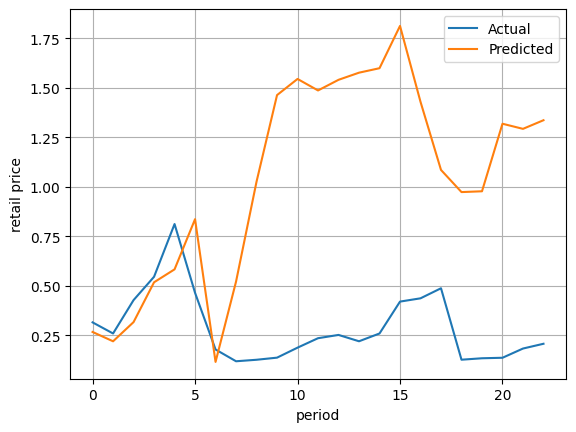

In [59]:
x_range = range(len(cabbage_y_test))  # x축 범위를 테스트 데이터의 길이만큼
plt.plot(x_range, cabbage_y_test[x_range], label='Actual')        # 실제값
plt.plot(x_range, pred[x_range], label = 'Predicted')             # 예측값

plt.ylabel('retail price')            # y축이름
plt.xlabel('period')                  # x축이름
plt.grid()                            # 격자 표시
plt.legend(loc='best')                # 범례 표시

plt.show()   